<span style='font-size:xx-large'>Jack Montoro </span>

<span style='font-size:xx-large'>K\-Means Clustering Final Project Lecture</span>

<span style='font-size:x-large'>Math 157</span>

<span style='font-size:x-large'>Monday, March 20, 2023</span>



<span style='font-size:large'>Run this first</span>


In [16]:
using Pkg

# Pkg.add("LsqFit")
# Pkg.add("CSV")
# Pkg.add("Parsers")
#Pkg.add("StatsBase")

using DataFrames
using CSV
using LsqFit
using StatsBase
using Clustering
using Plots
using RDatasets
using Statistics
using Distances

<span style='font-size:x-large'>K\-means clustering is an algorithm that takes in a data point value and evaluates its category on a basis not dissimilar to the K\-Nearest Neighbors algorithm, but instead of looking for individual data points as neighbors, it looks for clusters as neighbors. We will review KNN below and later take a look at K\-means clusters.</span></span></span><img src="https://miro.medium.com/v2/resize:fit:1080/1*fz-rjYPPRlGEMdTI-RLbDg.png"   width="1268px"  height="534px"  style="object-fit:cover"/>



<span style='font-size:xx-large'>**K Nearest Neighbor Review:**</span>


<span style='font-size:large'>K Nearest Neighbors is a supervised machine learning algorithm that we may use for regression or classification tasks. The inherent advantage of the KNN algorithm is that we do not need to make assumptions about the distributions of the data we are analyzing. </span>

<span style='font-size:large'>However, we do assume similarities between existing case data that we have access to and new data collected in order to group the new data. We group this new data according to its proximity to categories we have formed for the existing cases. For example, in the following photo we evaluate the new datum according to the classes A and B that we have established from the existing data. We evaluate the new datum on the basis of its proximity to the other entries, and assign its category.</span>

![](https://www.ibm.com/content/dam/connectedassets-adobe-cms/worldwide-content/cdp/cf/ul/g/ef/3a/KNN.component.xl.ts=1639762044031.png/content/adobe-cms/us/en/topics/knn/jcr:content/root/table_of_contents/intro/complex_narrative/items/content_group/image)



<span style='font-size:medium'>In the previous example we we looking at the 3 neighbor points closest to our new entry to classify the node, so we can deduce that k=3 here. How we define "proximity" is up to the implementation method of the data analyst, but one potential method of calculating proximity is the euclidean distance formula.</span>

<span style='font-size:medium'>Once we have the count of the categories of the k nearest neighbors, we can assign a category to our newest entry depending on which category among the k neighbors had the greatest count.</span>

<span style='font-size:medium'>This same distance formula will later be used to calculate the distances between our points for k\-means clusters.</span>


If we decide to go with euclidean distance formula as our distance function, we can calculate via $\sqrt{\sum_{i=1}^{n} (q_{i} - p_{i})^{2}} = \sqrt{(q_{1} - p_{1})^{2} + (q_{2} - p{2})^{2} + ... + (q_{n} - p_{n})^{2}}$ where p and q are separate points of dimension $n$. The following example is the trivial n=2: 


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Euclidean_distance_2d.svg/1200px-Euclidean_distance_2d.svg.png"   width="475px"  height="327px"  style="object-fit:cover"/>


<span style='font-size:x-large'>**Participation Check:**</span></span>


In the cell below, implement a function that returns the Euclidean distance of two points in dimension 2:


In [0]:
function euc2d_distance(p,q) # p and 2 are pairs
    #implement your function here
end

<span style='font-size:medium'>Here, we will use the iris dataset to build a dataframe and demonstrate our algorithm. </span>


In [2]:
iris = CSV.read("iris.csv", DataFrame)

150×6 DataFrame
 Row │ Id     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Specie ⋯
     │ Int64  Float64        Float64       Float64        Float64       String ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │     1            5.1           3.5            1.4           0.2  Iris-s ⋯
   2 │     2            4.9           3.0            1.4           0.2  Iris-s
   3 │     3            4.7           3.2            1.3           0.2  Iris-s
   4 │     4            4.6           3.1            1.5           0.2  Iris-s
   5 │     5            5.0           3.6            1.4           0.2  Iris-s ⋯
   6 │     6            5.4           3.9            1.7           0.4  Iris-s
   7 │     7            4.6           3.4            1.4           0.3  Iris-s
   8 │     8            5.0           3.4            1.5           0.2  Iris-s
   9 │     9            4.4           2.9            1.4           0.2  Iris-s ⋯
  10 │    10            4.9           3.1            1.5           0.1  Iris-s
  11 │    11            5.4           3.7            1.5           0.2  Iris-s
  ⋮  │   ⋮          ⋮             ⋮              ⋮             ⋮               ⋱
 141 │   141            6.7           3.1            5.6           2.4  Iris-v
 142 │   142            6.9           3.1            5.1           2.3  Iris-v ⋯
 143 │   143            5.8           2.7            5.1           1.9  Iris-v
 144 │   144            6.8           3.2            5.9           2.3  Iris-v
 145 │   145            6.7           3.3            5.7           2.5  Iris-v
 146 │   146            6.7           3.0            5.2           2.3  Iris-v ⋯
 147 │   147            6.3           2.5            5.0           1.9  Iris-v
 148 │   148            6.5           3.0            5.2           2.0  Iris-v
 149 │   149            6.2           3.4            5.4           2.3  Iris-v
 150 │   150            5.9           3.0            5.1           1.8  Iris-v ⋯
                                                   1 column and 129 rows omitted

<span style='font-size:large'>Here we obtain a new DataFrame X, which is iris, but with only the 4 relevant categories that we will use for our distance formula.</span>


In [3]:
X = select(iris, Not([:Species, :Id]))

150×4 DataFrame
 Row │ SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm 
     │ Float64        Float64       Float64        Float64      
─────┼──────────────────────────────────────────────────────────
   1 │           5.1           3.5            1.4           0.2
   2 │           4.9           3.0            1.4           0.2
   3 │           4.7           3.2            1.3           0.2
   4 │           4.6           3.1            1.5           0.2
   5 │           5.0           3.6            1.4           0.2
   6 │           5.4           3.9            1.7           0.4
   7 │           4.6           3.4            1.4           0.3
   8 │           5.0           3.4            1.5           0.2
   9 │           4.4           2.9            1.4           0.2
  10 │           4.9           3.1            1.5           0.1
  11 │           5.4           3.7            1.5           0.2
  ⋮  │       ⋮             ⋮              ⋮             ⋮
 141 │           6.7           3.1            5.6           2.4
 142 │           6.9           3.1            5.1           2.3
 143 │           5.8           2.7            5.1           1.9
 144 │           6.8           3.2            5.9           2.3
 145 │           6.7           3.3            5.7           2.5
 146 │           6.7           3.0            5.2           2.3
 147 │           6.3           2.5            5.0           1.9
 148 │           6.5           3.0            5.2           2.0
 149 │           6.2           3.4            5.4           2.3
 150 │           5.9           3.0            5.1           1.8
                                                129 rows omitted

In [5]:
function euclidean_distance(testPt, dataPt)
    dimension = size(testPt,1)
    distance = 0
    for i in 1:dimension
        distance += (testPt[i] - dataPt[i])^(2)
    end
    distance = sqrt(distance)
    return distance
end

euclidean_distance (generic function with 1 method)

<span style='font-size:large'>Once we have chosen our distance function, we can calculate the distance from our test data point to each of the other points in our dataset. Once we have calculated these values in the form of an array, we can sort the array to get the data points in terms of their distance to our test value.</span></span>



In [6]:
testPt = [5, 4, 2, 1]
distances = []
for i in 1:size(iris,1)
    push!(distances, euclidean_distance(testPt, X[i,:]))
end
iris[!, :distance] = distances # add a column using the distances vector we just created
iris

150×7 DataFrame
 Row │ Id     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Specie ⋯
     │ Int64  Float64        Float64       Float64        Float64       String ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │     1            5.1           3.5            1.4           0.2  Iris-s ⋯
   2 │     2            4.9           3.0            1.4           0.2  Iris-s
   3 │     3            4.7           3.2            1.3           0.2  Iris-s
   4 │     4            4.6           3.1            1.5           0.2  Iris-s
   5 │     5            5.0           3.6            1.4           0.2  Iris-s ⋯
   6 │     6            5.4           3.9            1.7           0.4  Iris-s
   7 │     7            4.6           3.4            1.4           0.3  Iris-s
   8 │     8            5.0           3.4            1.5           0.2  Iris-s
   9 │     9            4.4           2.9            1.4           0.2  Iris-s ⋯
  10 │    10            4.9           3.1            1.5           0.1  Iris-s
  11 │    11            5.4           3.7            1.5           0.2  Iris-s
  ⋮  │   ⋮          ⋮             ⋮              ⋮             ⋮               ⋱
 141 │   141            6.7           3.1            5.6           2.4  Iris-v
 142 │   142            6.9           3.1            5.1           2.3  Iris-v ⋯
 143 │   143            5.8           2.7            5.1           1.9  Iris-v
 144 │   144            6.8           3.2            5.9           2.3  Iris-v
 145 │   145            6.7           3.3            5.7           2.5  Iris-v
 146 │   146            6.7           3.0            5.2           2.3  Iris-v ⋯
 147 │   147            6.3           2.5            5.0           1.9  Iris-v
 148 │   148            6.5           3.0            5.2           2.0  Iris-v
 149 │   149            6.2           3.4            5.4           2.3  Iris-v
 150 │   150            5.9           3.0            5.1           1.8  Iris-v ⋯
                                                  2 columns and 129 rows omitted

In [7]:
# Here we will obtain the k nearest neighbor distances when k = 10
# We can do this by sorting the DataFrame according to the lowest assigned distance value
k_nearest = first(sort(iris,[:distance]),10)

10×7 DataFrame
 Row │ Id     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Specie ⋯
     │ Int64  Float64        Float64       Float64        Float64       String ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │    45            5.1           3.8            1.9           0.4  Iris-s ⋯
   2 │    44            5.0           3.5            1.6           0.6  Iris-s
   3 │     6            5.4           3.9            1.7           0.4  Iris-s
   4 │    22            5.1           3.7            1.5           0.4  Iris-s
   5 │    20            5.1           3.8            1.5           0.3  Iris-s ⋯
   6 │    24            5.1           3.3            1.7           0.5  Iris-s
   7 │    47            5.1           3.8            1.6           0.2  Iris-s
   8 │    27            5.0           3.4            1.6           0.4  Iris-s
   9 │    17            5.4           3.9            1.3           0.4  Iris-s ⋯
  10 │    25            4.8           3.4            1.9           0.2  Iris-s
                                                               2 columns omitted

<span style='font-size:medium'><span style='font-size:large'>We can then use the most common label of the k nearest points in the distance array, to find the category of our test point. We repeat this process until we have categorized all of our test points.</span></span>



In [8]:
maxCount = 0
maxLabel = ""
#Get a map of each species to the number of times each species appears among the k nearest neighbors
counts = countmap(k_nearest[:,"Species"])
labels = unique(k_nearest[:,"Species"])
for label in labels
    if counts[label] > maxCount
        maxLabel = label
    end
end
#Return the label that appears the most times
maxLabel

"Iris-setosa"

<span style='font-size:medium'>Of our 10 nearest neighbors, we can see that Iris\-setosa is the most frequent species category the appears, so we would assign our test value this species label.</span>


<span style='font-size:xx-large'>**K\-Means Clustering Algorithm**</span>


<span style='font-size:x-large'>This method that we use in KNN algorithm for data point categorization is utilized in k\-means where we do not need to assume we have any information about species, but categorize the information according to selected cluster values, and each cluster is defined by our given distance formula. </span>


<span style='font-size:medium'>We select k clusters for which we calculate k means. Selecting the optimal k value can be achieved by iterating over each value of k to k = n \(where n is the number of data entries\) and plotting the variance of the clusters against each value of k.</span>

<span style='font-size:medium'>To get the optimal value of k, we find the value of k after which the rate of variance reduction diminishes.</span><img src="https://i.stack.imgur.com/vc01j.png"   width="809px"  height="542px"  style="object-fit:cover"/>


<span style='font-size:medium'>In this example, the optimal k value would be 2, as we can observe above that the rate of variation decrease between clusters drops of at 2 clusters.</span>


In [9]:
petalData = collect(Matrix(X)')


4×150 Matrix{Float64}:
 5.1  4.9  4.7  4.6  5.0  5.4  4.6  5.0  …  6.8  6.7  6.7  6.3  6.5  6.2  5.9
 3.5  3.0  3.2  3.1  3.6  3.9  3.4  3.4     3.2  3.3  3.0  2.5  3.0  3.4  3.0
 1.4  1.4  1.3  1.5  1.4  1.7  1.4  1.5     5.9  5.7  5.2  5.0  5.2  5.4  5.1
 0.2  0.2  0.2  0.2  0.2  0.4  0.3  0.2     2.3  2.5  2.3  1.9  2.0  2.3  1.8



Below, we obtains the optimal cluster set for the collected data when k=3.

We typically get a cluster by choosing three points at random, and designating them as our cluster points.

We then form our clusters by calculating the distance of each point to each of the three clusters. We assign each point to the cluster it is closest to.

Once every point is assigned, we get the mean of each cluster, and calculate the clusters again by assigning each point its cluster by calculating its proximity to this calculated mean.

We repeat this last process until the means of clusters calculated from our latest iteration is the same as the means calculated from our previous iteration.

This is a lot of work, but thankfully with the Julia package Clusters, we can calculate the k-means for our data with just a single function.

In [48]:
K = 1:10
KM = [kmeans(petalData,k) for k in K]

SSE = zeros(size(KM,1))
for k in 1:size(KM,1)
    for i in 1:size(petalData,2)
        SSE[k] += (euclidean_distance(petalData[:,i], KM[k].centers[:,assignments(KM[k])[i]]))^(2)
    end
end
println(SSE)

[680.8243999999999, 152.36870647733917, 78.940841426146, 71.34399911845368, 46.535582051282056, 43.581405998389705, 34.18920546865629, 30.373182567432575, 31.70026250743694, 27.910623604465727]


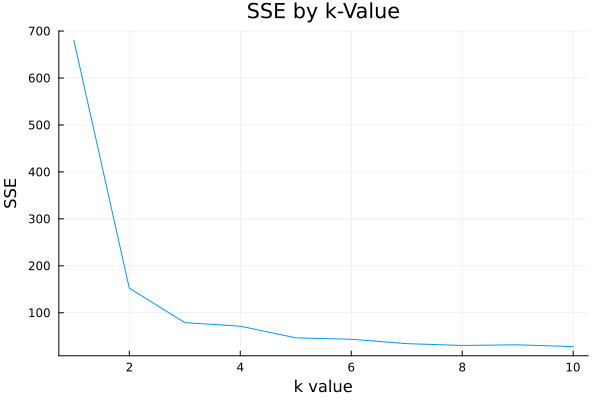

In [50]:
plot(K, SSE, legend=false)
title!("SSE by k-Value")
xlabel!("k value")
ylabel!("SSE")

<span style='font-size:x-large'>We can see from the plot that our "elbow" value is k=3, as this is the point where the rate of decrease for SSE per k value falls off. </span>

<span style='font-size:x-large'>We know this is the case as there are in fact three species of iris, but we can verify visually with scatter plots that this is true.</span>


In [26]:
cluster3 = kmeans(petalData, 3)

KmeansResult{Matrix{Float64}, Float64, Int64}([5.88360655737705 5.005999999999999 6.853846153846153; 2.740983606557377 3.4180000000000006 3.0769230769230766; 4.388524590163935 1.464 5.715384615384615; 1.4344262295081966 0.2439999999999999 2.053846153846153], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  3, 3, 1, 3, 3, 3, 1, 3, 3, 1], [0.02159199999999828, 0.19199199999999905, 0.1699920000000077, 0.2691920000000039, 0.039191999999999894, 0.46759199999999623, 0.1723920000000163, 0.003592000000011808, 0.6415920000000028, 0.1343920000000054  …  0.1573372781064677, 0.4419526627218886, 0.7316259070142337, 0.11272189349114115, 0.2727218934911093, 0.3557988165680399, 0.8221177102929005, 0.3996449704141867, 0.6919526627218886, 0.7071996775060256], [61, 50, 39], [61, 50, 39], 78.9450658259765, 9, true)

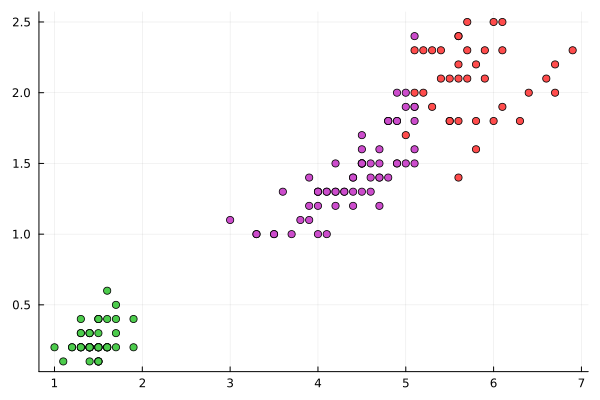

In [28]:
scatter(iris.PetalLengthCm, iris.PetalWidthCm, marker_z=cluster3.assignments, color=:lightrainbow, legend = false)

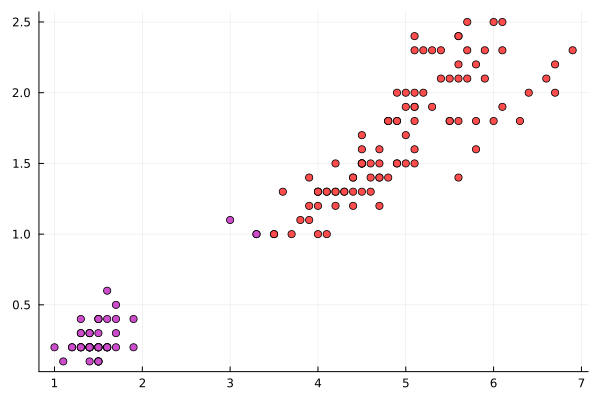

In [10]:
cluster2 = kmeans(petalData, 2)
scatter(iris.PetalLengthCm, iris.PetalWidthCm, marker_z=cluster2.assignments, color=:lightrainbow, legend = false)

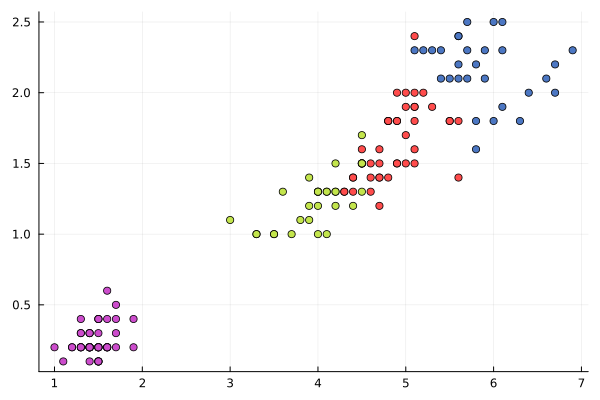

In [11]:
cluster4 = kmeans(petalData, 4)
scatter(iris.PetalLengthCm, iris.PetalWidthCm, marker_z=cluster4.assignments, color=:lightrainbow, legend = false)

In the plots above, we can see that _variation_ between the point clusters drops off most precipitously when k=3. This means that adding more clusters has diminishing returns for the distance of each data point to its cluster mean as visualized in the SSE plot. This means that adding more clusters will probably not provide greater optimization of our categories. Therefore, we may conclude that k=3 is the optimal categorization.


<span style='font-size:large'>K\-means Clustering may be applied to a plethora of real\-world examples, such as targeted ad campaigns that group customers according to available data to determine potential interest in a product or service It may also be used to detect patterns in fraud, data breaches, or IT alerts based on observed commonalities between incidents.</span>


<span style='font-size:xx-large'>Homework Questions:</span>



<span style='font-size:large'><span style='font-size:medium'>Problem 1\) Alternative distance formula:</span></span>

<span style='font-size:medium'>You may run into situations where you would like to use some formula other than Euclidean distance to calculate the distance between datapoints. One alternative you may choose is the Minkowski Distance Formula. </span>

<span style='font-size:medium'>This formula is represented as</span><img src="https://rittikghosh.com/images/min.png"   width="276px"  height="136px"  style="object-fit:cover"/><span style='font-size:medium'> </span></span> 


<span style='font-size:medium'>where n is the dimensions of the data points, x is your first point, y is your second point, and p is the power parameter. For instance, if your power parameter is 2, your distance is Euclidean.</span>


In [0]:
#Given two points x and y and power p, write a function to calculate minkowski distance
function minkowski_distance(x,y,p)
    #WRITE YOUR ANSWER HERE
end

<span style='font-size:x-large'>Using the kmeans function, find a k value that optimizes the kmeans clusters for the following dataset:</span>


In [52]:
credit = CSV.read("CreditCardCustomerData.csv", DataFrame)

660×7 DataFrame
 Row │ Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  Total_visits ⋯
     │ Int64  Int64         Int64             Int64               Int64        ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │     1         87073            100000                   2               ⋯
   2 │     2         38414             50000                   3
   3 │     3         17341             50000                   7
   4 │     4         40496             30000                   5
   5 │     5         47437            100000                   6               ⋯
   6 │     6         58634             20000                   3
   7 │     7         48370            100000                   5
   8 │     8         37376             15000                   3
   9 │     9         82490              5000                   2               ⋯
  10 │    10         44770              3000                   4
  11 │    11         52741             10000                   4
  ⋮  │   ⋮         ⋮               ⋮                  ⋮                   ⋮    ⋱
 651 │   651         78996            195000                  10
 652 │   652         78404            132000                   9               ⋯
 653 │   653         28525            156000                   8
 654 │   654         51826             95000                  10
 655 │   655         65750            172000                  10
 656 │   656         51108             99000                  10               ⋯
 657 │   657         60732             84000                  10
 658 │   658         53834            145000                   8
 659 │   659         80655            172000                  10
 660 │   660         80150            167000                   9               ⋯
                                                  3 columns and 639 rows omitted

We notice that the row number is equal to the SI number and Customer Key is an arbitrary value, so this column is superfluous. We can clean up the data further:



In [53]:
credit = select(credit, Not(["Sl_No", "Customer Key"]))

660×5 DataFrame
 Row │ Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  Total_visits_o ⋯
     │ Int64             Int64               Int64              Int64          ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │           100000                   2                  1                 ⋯
   2 │            50000                   3                  0
   3 │            50000                   7                  1
   4 │            30000                   5                  1
   5 │           100000                   6                  0                 ⋯
   6 │            20000                   3                  0
   7 │           100000                   5                  0
   8 │            15000                   3                  0
   9 │             5000                   2                  0                 ⋯
  10 │             3000                   4                  0
  11 │            10000                   4                  0
  ⋮  │        ⋮                  ⋮                   ⋮                   ⋮     ⋱
 651 │           195000                  10                  1
 652 │           132000                   9                  1                 ⋯
 653 │           156000                   8                  1
 654 │            95000                  10                  0
 655 │           172000                  10                  1
 656 │            99000                  10                  1                 ⋯
 657 │            84000                  10                  1
 658 │           145000                   8                  1
 659 │           172000                  10                  1
 660 │           167000                   9                  0                 ⋯
                                                  2 columns and 639 rows omitted

For this dataframe, utilize the kmeans function to get the best approximate categorization of clusters


<span style='font-size:x-large'>Part 1: Arrange the Dataframe "credit" so we can get k\-means for a k\-value of 2.</span>


In [0]:
#Write your work here

<span style='font-size:x-large'>Part 2: Write a function to return a vector of size 10 filled with all the kmeans objects for our given data from k=1 to k=10.</span>


In [0]:
#Write your work here

<span style='font-size:x-large'>Part 3: Plot your information with the k\-values in the X\-axis and the SSE for each k\-value in the Y\-axis.</span>


In [0]:
#Write your work here

<span style='font-size:x-large'>**Solutions:**</span>


Participation Check Euclidean Distance:


In [20]:
function euclidean_distance(p,q) # p and 2 are pairs
    distance = 0
    for i in 1:2
        distance += (p[i] - q[i])^(2)
    end
    distance = sqrt(distance)
    distance
end

euclidean_distance (generic function with 1 method)

Minkowski Distance Solution:


In [21]:
function minkowski_distance(x,y,p)
    dim = size(x, 1)
    distance = 0
    for i in 1:dim
        distance += (x[i] - y[i])^(p)
    end
    distance = (distance)^(1/p)
    distance
end

minkowski_distance (generic function with 1 method)

K\-Means For Credit Card Data Solution



In [54]:
creditData = collect(Matrix(credit)')

5×660 Matrix{Int64}:
 100000  50000  50000  30000  100000  20000  …  84000  145000  172000  167000
      2      3      7      5       6      3        10       8      10       9
      1      0      1      1       0      0         1       1       1       0
      1     10      3      1      12      1        13       9      15      12
      0      9      4      4       3      8         2       1       0       2

In [23]:
c2 = kmeans(creditData, 2)

KmeansResult{Matrix{Float64}, Float64, Int64}([25916.530278232407 142530.61224489796; 4.396072013093289 8.571428571428571; … ; 1.967266775777414 10.571428571428571; 3.785597381342062 1.0612244897959184], [2, 1, 1, 1, 2, 1, 2, 1, 1, 1  …  2, 2, 2, 2, 2, 2, 1, 2, 2, 2], [1.808853114014576e9, 5.8001361399685e8, 5.800135241294193e8, 1.6674728712070704e7, 1.8088529906880417e9, 3.5005357672790766e7, 1.8088529920962029e9, 1.1917065045347822e8, 4.3750125430454206e8, 5.251673779117434e8  …  2.753036656524788e9, 1.108937975247879e8, 1.8142441472885895e8, 2.2591591223819237e9, 8.684448193411102e8, 1.8949142060758018e9, 3.3736896136302376e9, 6.09787885131073e6, 8.684448376064148e8, 5.987509405655975e8], [611, 49], [611, 49], 3.160589584082104e11, 2, true)

In [65]:
K2 = 1:10
KM2 = [kmeans(creditData,k) for k in K2]

SSE2 = zeros(size(KM2,1))
for k in 1:size(KM2,1)
    for i in 1:size(creditData,2)
        SSE2[k] += (euclidean_distance(creditData[:,i], KM2[k].centers[:,assignments(KM2[k])[i]]))^(2)
    end
end
println(SSE2)

[9.329313780629744e11, 3.160589584082105e11, 9.397591458873035e10, 5.31938565245078e10, 3.0884753695648746e10, 2.372730675455364e10, 1.9219327754243706e10, 1.9362319640311893e10, 9.56700593340032e9, 8.635433751425049e9]


In [66]:
plot(K2, SSE2, legend=false)
title!("SSE by k-Value")
xlabel!("k value")
ylabel!("SSE")

<span style='font-size:large'>We can see that the "elbow" point on this plot is k=3, so we can conclude that the optimal number of k\-means clusers is 3.</span>

<span style='font-size:large'>We verify the results below.</span>


In [27]:
scatter(credit.Total_Credit_Cards, credit.Avg_Credit_Limit, marker_z=c2.assignments, color=:lightrainbow, legend = false)

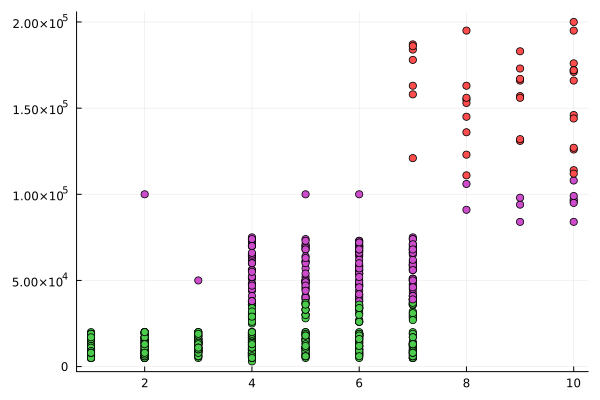

In [28]:
c3 = kmeans(creditData, 3)
scatter(credit.Total_Credit_Cards, credit.Avg_Credit_Limit, marker_z=c3.assignments, color=:lightrainbow, legend = false)

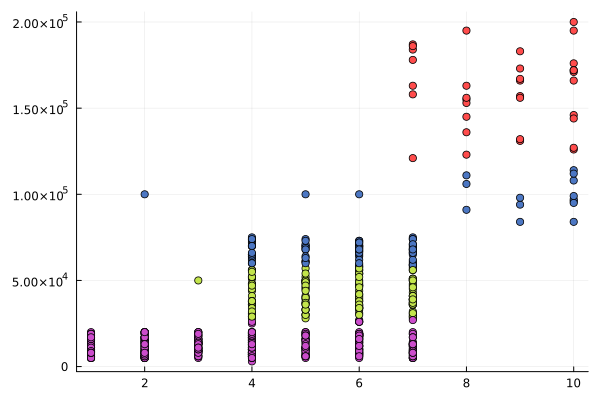

In [29]:
c4 = kmeans(creditData, 4)
scatter(credit.Total_Credit_Cards, credit.Avg_Credit_Limit, marker_z=c4.assignments, color=:lightrainbow, legend = false)

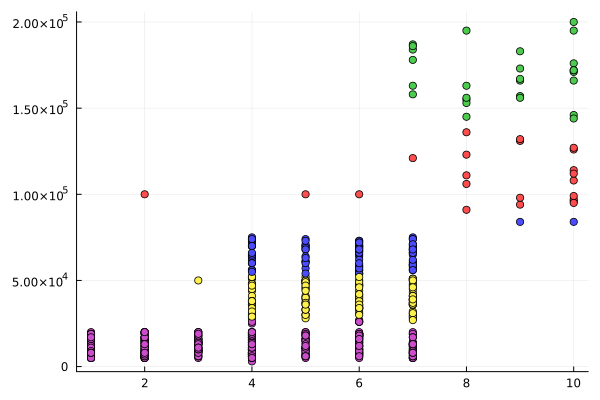

In [38]:
c5 = kmeans(creditData, 5)
scatter(credit.Total_Credit_Cards, credit.Avg_Credit_Limit, marker_z=c5.assignments, color=:lightrainbow, legend = false)

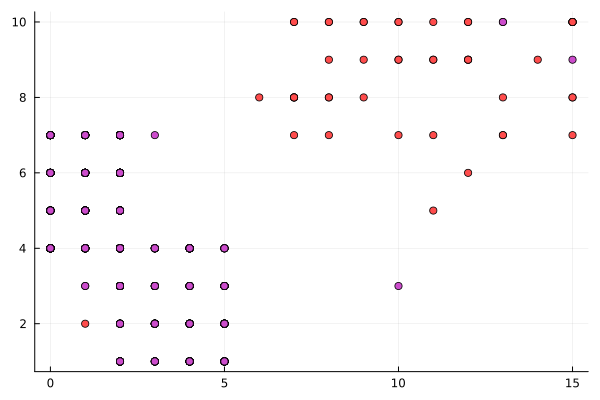

In [41]:
scatter(credit.Total_visits_online, credit.Total_Credit_Cards, marker_z=c2.assignments, color=:lightrainbow, legend = false)

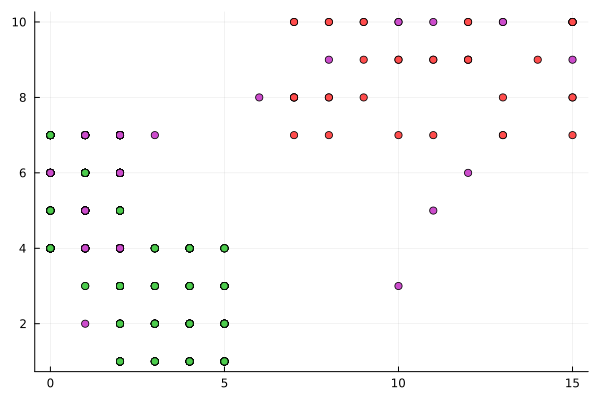

In [36]:
scatter(credit.Total_visits_online, credit.Total_Credit_Cards, marker_z=c3.assignments, color=:lightrainbow, legend = false)

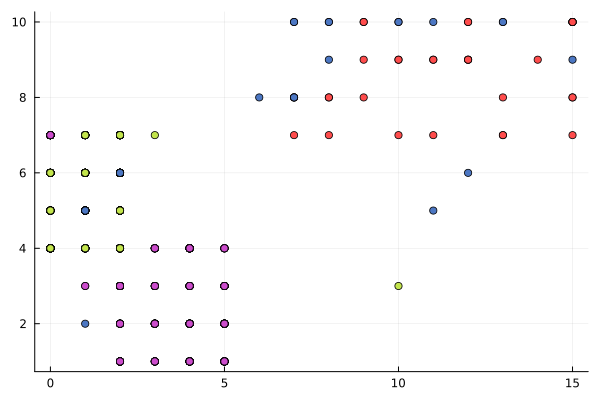

In [40]:
scatter(credit.Total_visits_online, credit.Total_Credit_Cards, marker_z=c4.assignments, color=:lightrainbow, legend = false)

In [42]:
scatter(credit.Total_visits_online, credit.Total_Credit_Cards, marker_z=c5.assignments, color=:lightrainbow, legend = false)

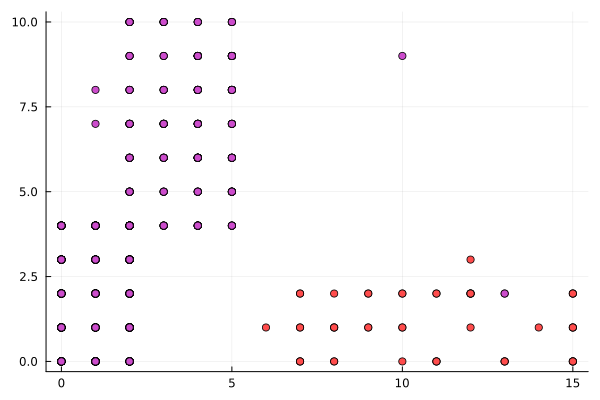

In [43]:
scatter(credit.Total_visits_online, credit.Total_calls_made, marker_z=c2.assignments, color=:lightrainbow, legend = false)

In [39]:
scatter(credit.Total_visits_online, credit.Total_calls_made, marker_z=c3.assignments, color=:lightrainbow, legend = false)

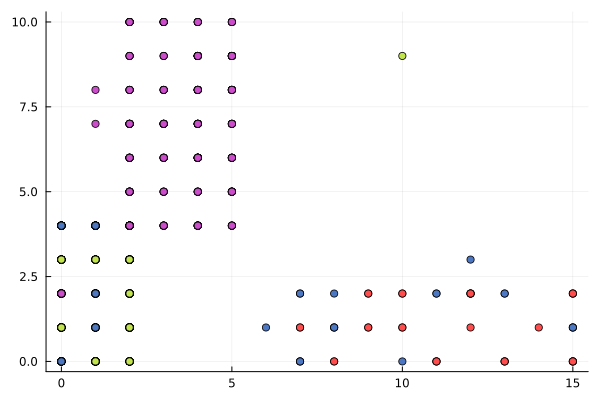

In [44]:
scatter(credit.Total_visits_online, credit.Total_calls_made, marker_z=c4.assignments, color=:lightrainbow, legend = false)

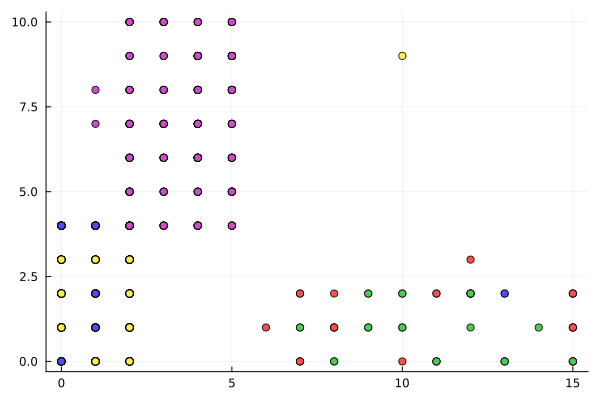

In [45]:
scatter(credit.Total_visits_online, credit.Total_calls_made, marker_z=c5.assignments, color=:lightrainbow, legend = false)

In [0]:
Proximity here is primarily determined by Average Credit Limit, so it is most sensible to organize the data into three strata. Therefore, we say k=3.